In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./store5.csv")

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.0,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.0,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.0,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.0,0,NaN
4,1456,2013-01-01,5,BOOKS,0.0,0,NaN


In [4]:
df = df.drop(columns=['id','dcoilwtico'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         55572 non-null  object 
 1   store_nbr    55572 non-null  int64  
 2   family       55572 non-null  object 
 3   sales        55572 non-null  float64
 4   onpromotion  55572 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])
df['raw_date'] = df['date']

df = df.set_index('date')

df['date'] = df['raw_date']

df = df.drop(columns=['raw_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55572 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   store_nbr    55572 non-null  int64         
 1   family       55572 non-null  object        
 2   sales        55572 non-null  float64       
 3   onpromotion  55572 non-null  int64         
 4   date         55572 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.5+ MB


In [7]:
df.head()

,store_nbr,family,sales,onpromotion,date
date,,,,,
2013-01-01,5,AUTOMOTIVE,0.0,0,2013-01-01
2013-01-01,5,BABY CARE,0.0,0,2013-01-01
2013-01-01,5,BEAUTY,0.0,0,2013-01-01
2013-01-01,5,BEVERAGES,0.0,0,2013-01-01
2013-01-01,5,BOOKS,0.0,0,2013-01-01


In [8]:
df.describe()

,store_nbr,sales,onpromotion,date
count,55572.0,55572.000000,55572.000000,55572
mean,5.0,280.580231,2.687864,2015-04-24 08:27:04.703088128
min,5.0,0.000000,0.000000,2013-01-01 00:00:00
25%,5.0,1.000000,0.000000,2014-02-26 18:00:00
50%,5.0,19.000000,0.000000,2015-04-24 12:00:00
75%,5.0,237.000000,0.000000,2016-06-19 06:00:00
max,5.0,8216.620000,182.000000,2017-08-15 00:00:00
std,0.0,652.588149,11.748996,NaN


In [9]:
data = df[df['family'].isin(['AUTOMOTIVE', 'BEAUTY', 'BEVERAGES', 'BREAD/BAKERY'])]

In [10]:
print(data['family'])

date
2013-01-01      AUTOMOTIVE
2013-01-01          BEAUTY
2013-01-01       BEVERAGES
2013-01-01    BREAD/BAKERY
2013-01-02      AUTOMOTIVE
                  ...     
2017-08-14    BREAD/BAKERY
2017-08-15      AUTOMOTIVE
2017-08-15          BEAUTY
2017-08-15       BEVERAGES
2017-08-15    BREAD/BAKERY
Name: family, Length: 6736, dtype: object


In [11]:
for col in data.columns:
    zero_data = data[data[col] == 0]
    print(col, len(zero_data), len(data) - len(zero_data), (len(zero_data) / len(data)) * 100)

store_nbr 0 6736 0.0
family 0 6736 0.0
sales 91 6645 1.3509501187648456
onpromotion 4552 2184 67.57719714964371
date 0 6736 0.0


Sales: There are 91 rows with a value of 0

In [12]:
def family_data(data, family=None):
    data_family = data[data['family'] == family]

    if data_family is None:
        return [], None
    
    new_family_data = data_family.resample('W-MON').agg(
        sales=('sales', 'sum'),
        family=('family', 'first'),
        onpromotion=('onpromotion', 'sum')
    ).reset_index()
    
    return new_family_data

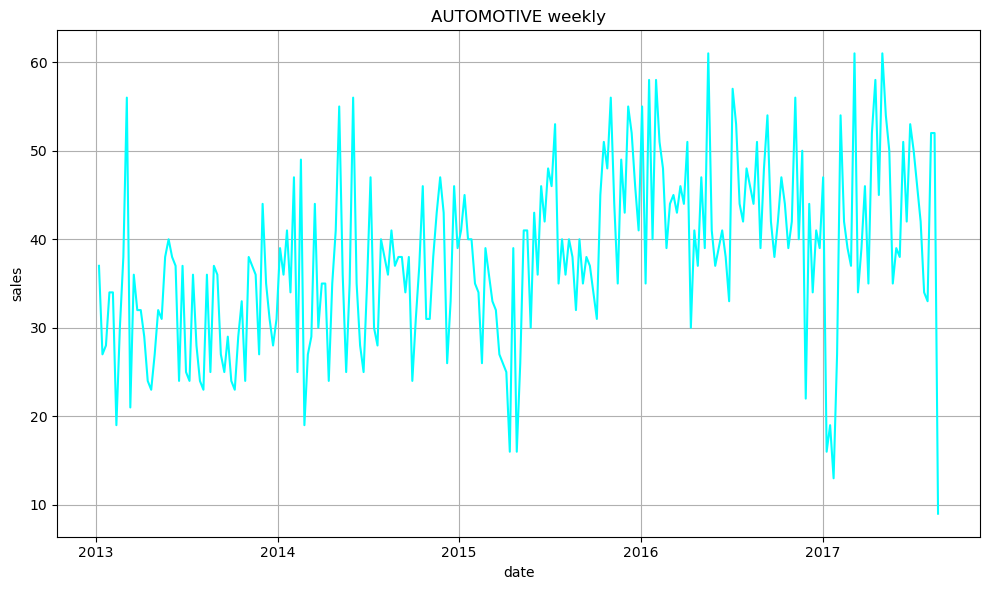

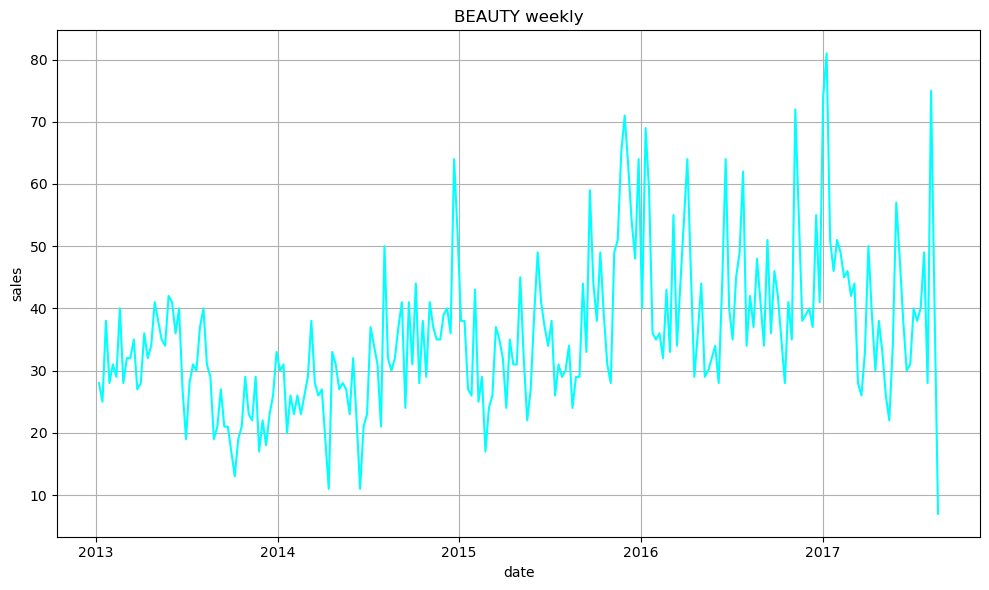

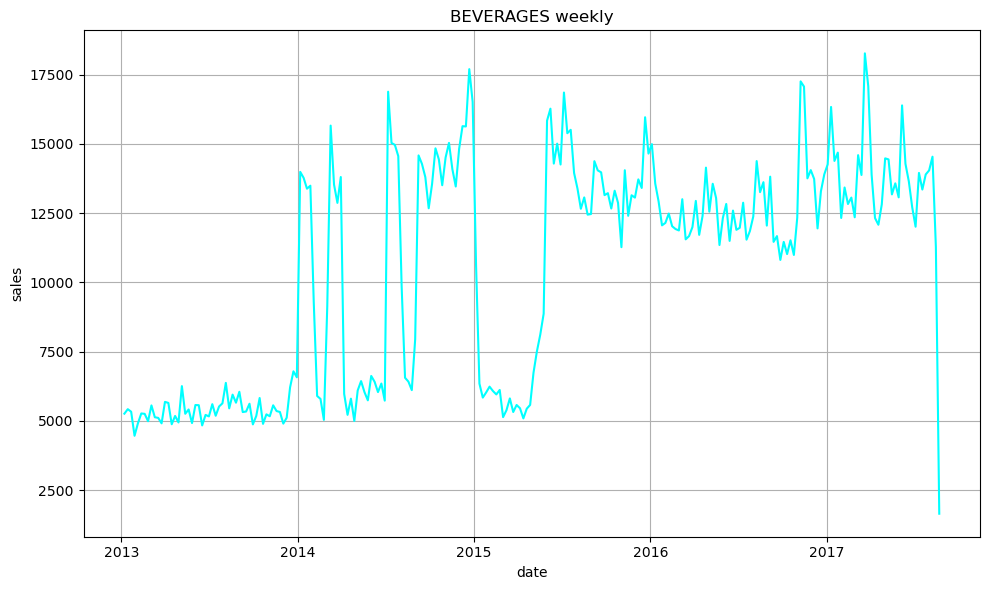

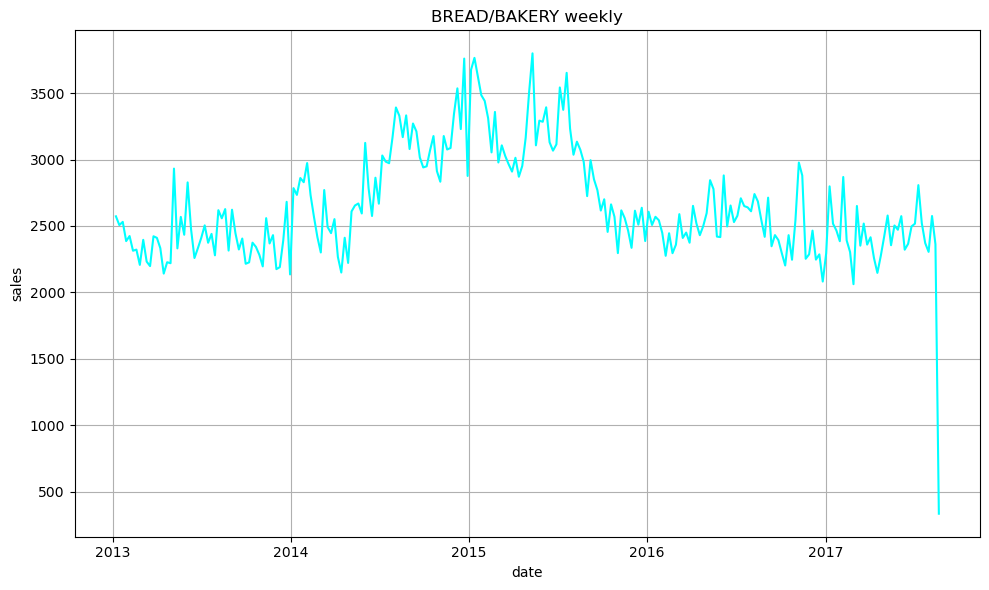

In [13]:
def plot_family(x, y, title, color):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, linestyle='-', color='cyan')
    plt.title(title)
    plt.xlabel('date')
    plt.ylabel('sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
for family in data['family'].unique():
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        plot_family(fam_data_weekly['date'], fam_data_weekly['sales'], f"{family} weekly", 'cyan')
    else:
        print(f"No data found for family '{family}'")

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    if result[1] <= 0.05:
        print("Ho: Data has no unit root and is stationary.")
    else:
        print("H1: time series has a unit root, indicating it is non-stationary.")

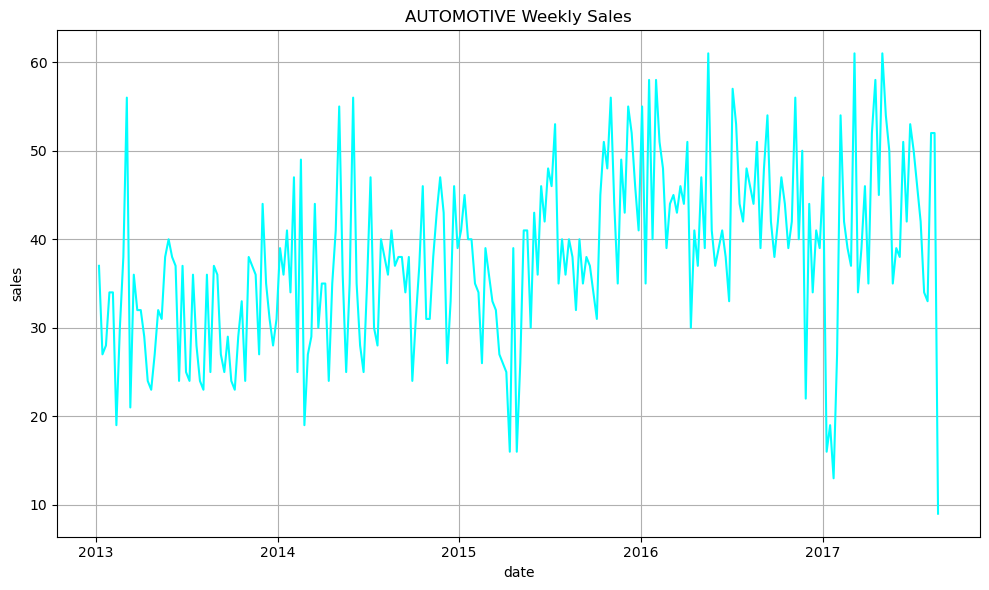

ADF Statistic: -4.2423925825044435
p-value: 0.000558093572640482
Critical Values:
	1%: -3.458128284586202
	5%: -2.873761835239286
	10%: -2.5732834559706235
Ho: Data has no unit root and is stationary.


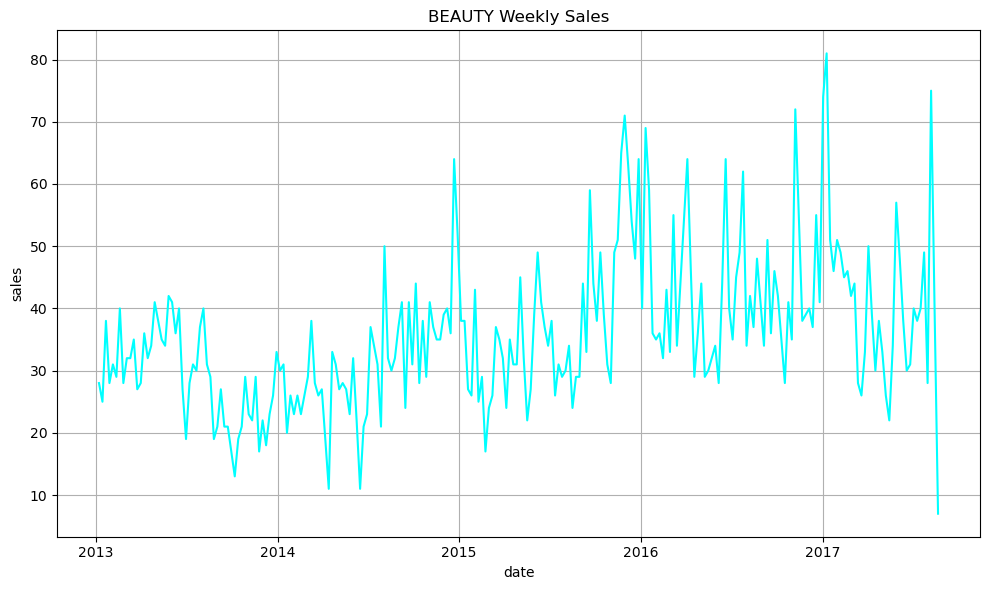

ADF Statistic: -4.2984061984327
p-value: 0.00044704382886767366
Critical Values:
	1%: -3.458128284586202
	5%: -2.873761835239286
	10%: -2.5732834559706235
Ho: Data has no unit root and is stationary.


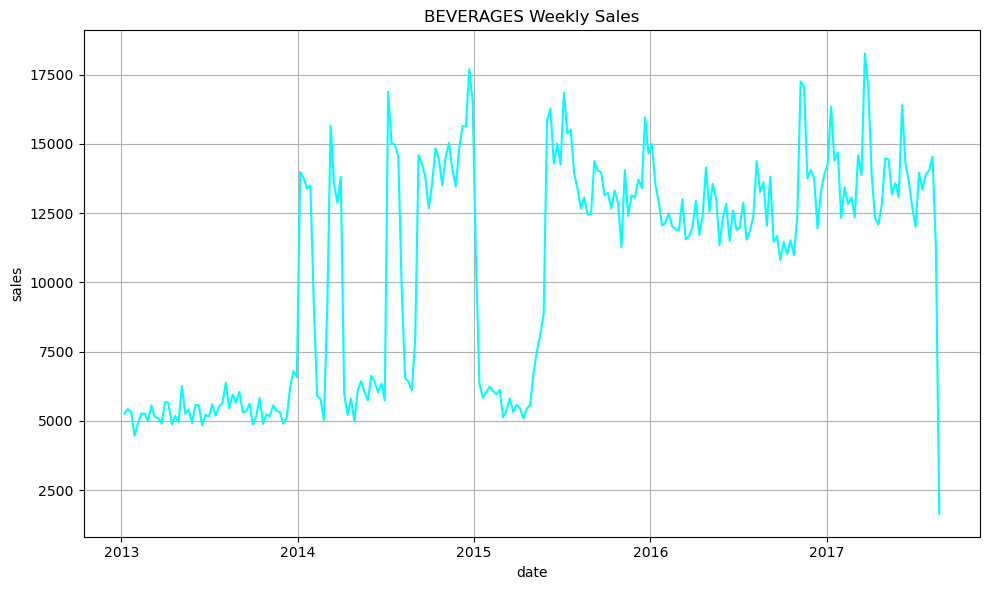

ADF Statistic: -2.746119058108519
p-value: 0.06639196564163938
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
H1: time series has a unit root, indicating it is non-stationary.


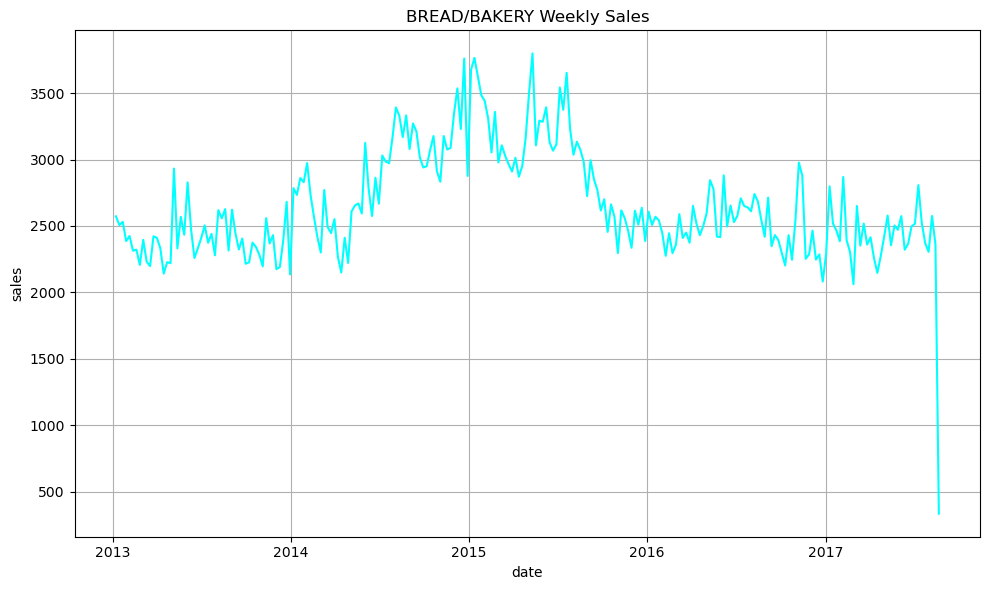

ADF Statistic: -1.1401085807560452
p-value: 0.698815034637827
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
H1: time series has a unit root, indicating it is non-stationary.


In [15]:
for family in data['family'].unique():
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        plot_family(fam_data_weekly['date'], fam_data_weekly['sales'], f"{family} Weekly Sales", 'cyan')
        
       
        adf_test(fam_data_weekly['sales'], title=f"{family} Weekly Sales")
    else:
        print(f"No data found for family '{family}'")

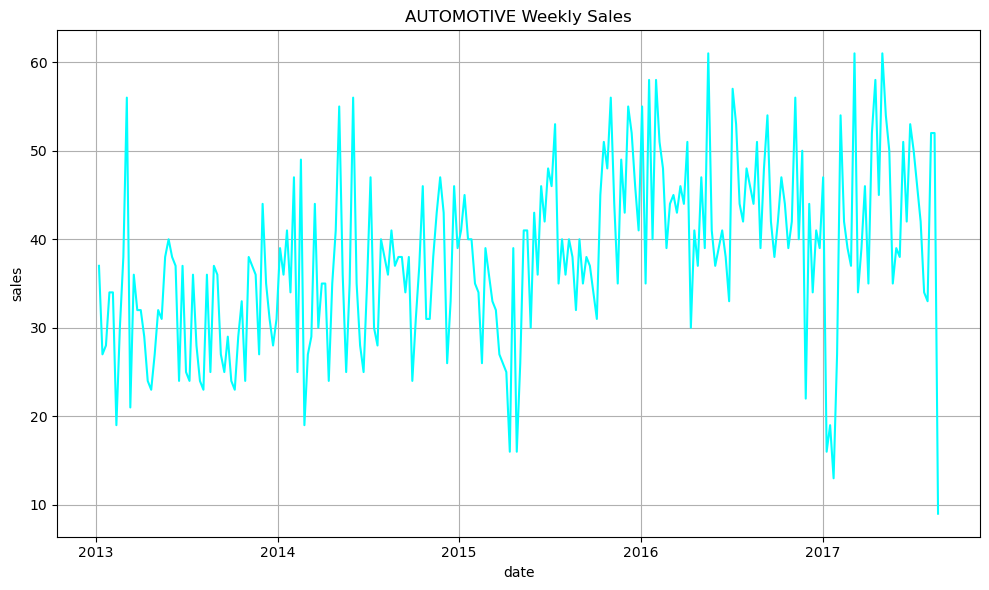

ADF Statistic: -9.026776843040304
p-value: 5.5826072356516574e-15
Critical Values:
	1%: -3.4586084859607156
	5%: -2.873972159235721
	10%: -2.57339565928848
Ho: Data has no unit root and is stationary.


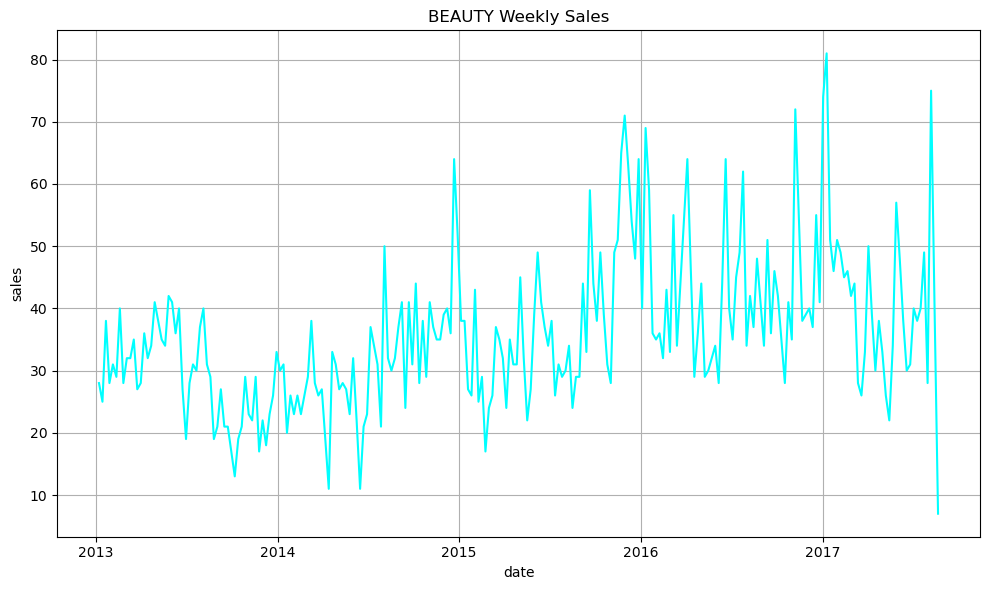

ADF Statistic: -9.354718425858978
p-value: 8.117394647306783e-16
Critical Values:
	1%: -3.4584868856997004
	5%: -2.873918902362675
	10%: -2.573367247623359
Ho: Data has no unit root and is stationary.


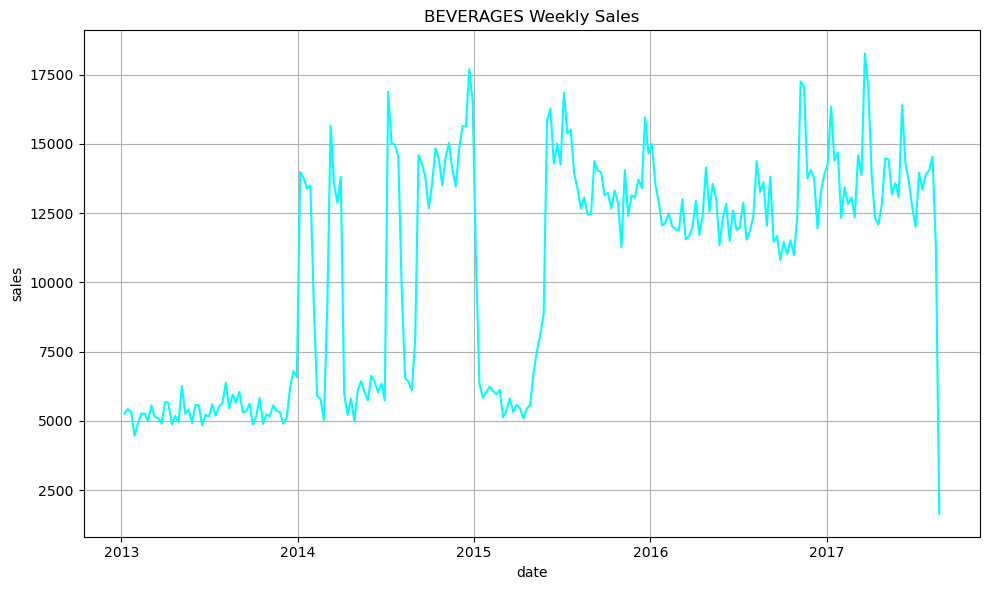

ADF Statistic: -4.997256926419219
p-value: 2.247225467836596e-05
Critical Values:
	1%: -3.458731141928624
	5%: -2.8740258764297293
	10%: -2.5734243167124093
Ho: Data has no unit root and is stationary.


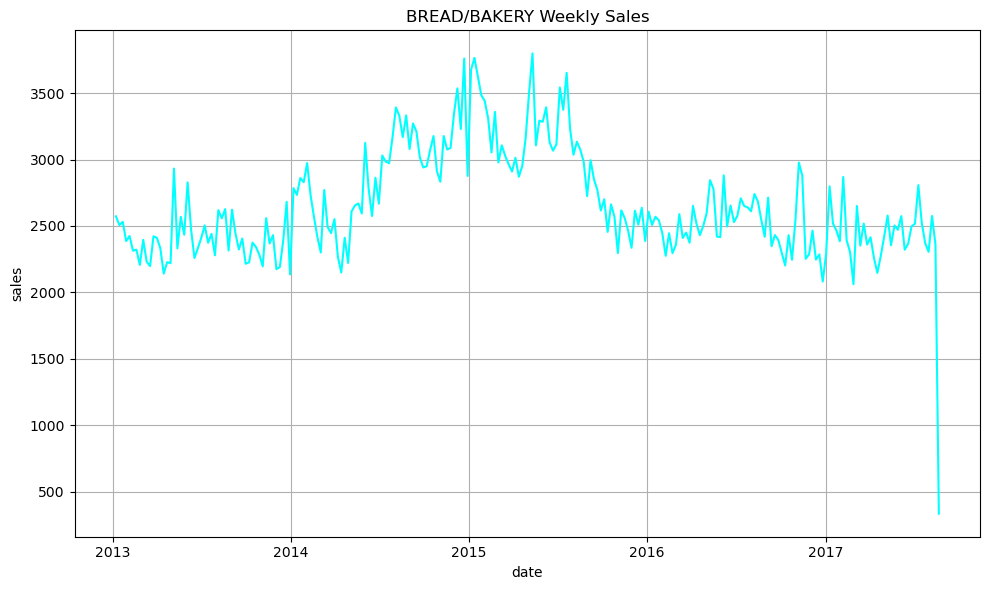

ADF Statistic: -5.229945172348402
p-value: 7.635219295885637e-06
Critical Values:
	1%: -3.458731141928624
	5%: -2.8740258764297293
	10%: -2.5734243167124093
Ho: Data has no unit root and is stationary.


In [16]:
for family in data['family'].unique():
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        plot_family(fam_data_weekly['date'], fam_data_weekly['sales'], f"{family} Weekly Sales", 'cyan')
        
        fam_data_weekly['sales_diff'] = fam_data_weekly['sales'].diff().fillna(0)
        
        adf_test(fam_data_weekly['sales_diff'], title=f"{family} Weekly Sales After Differencing")
    else:
        print(f"No data found for family '{family}'")

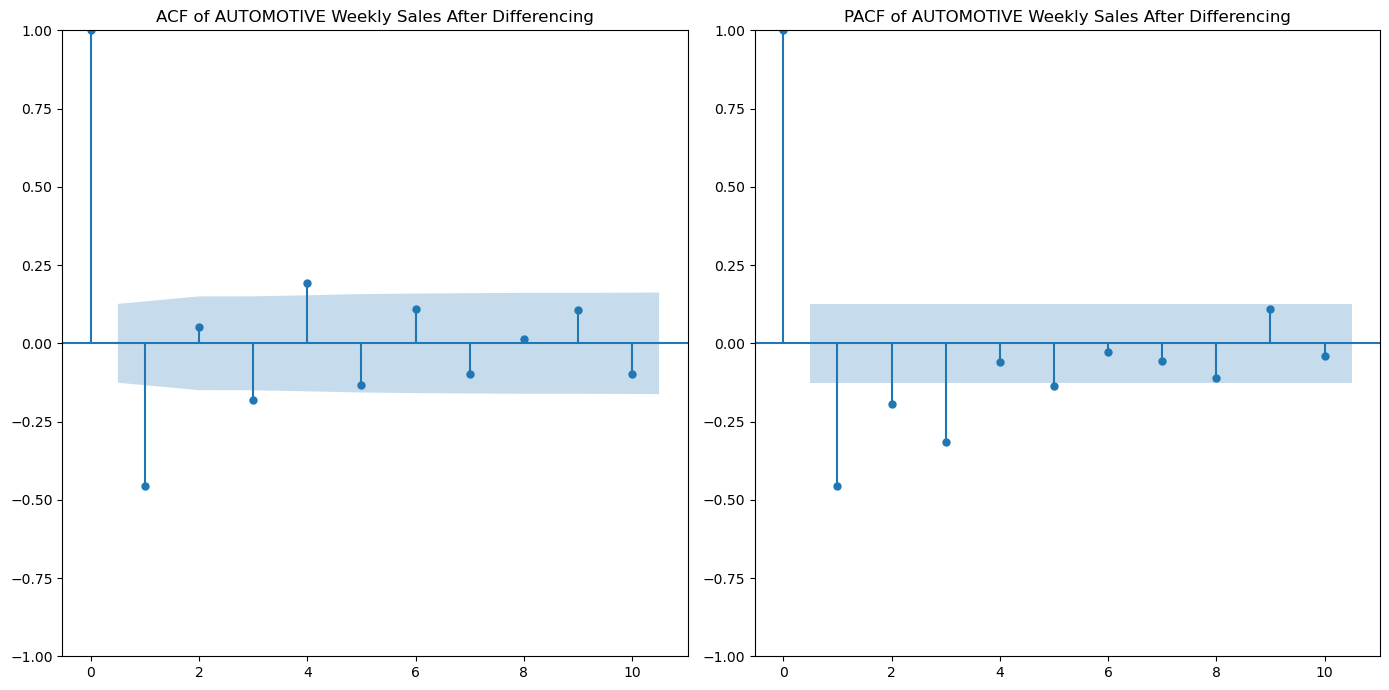

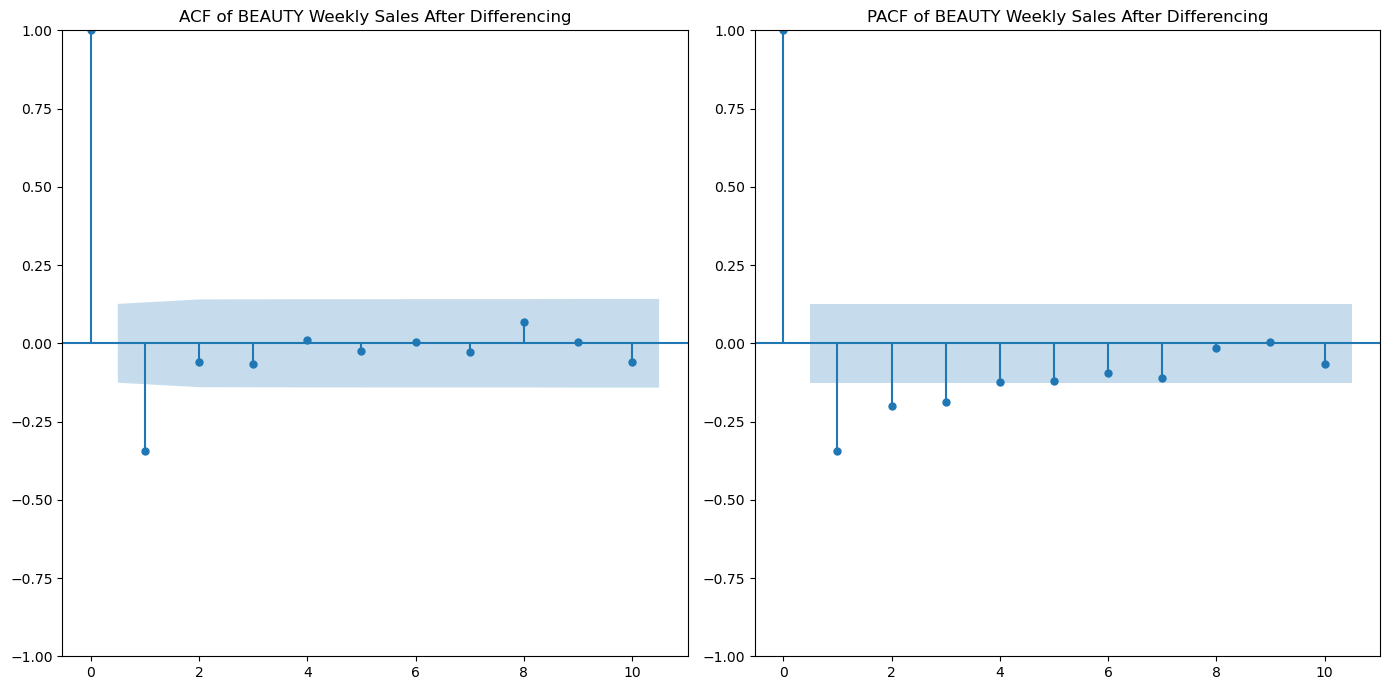

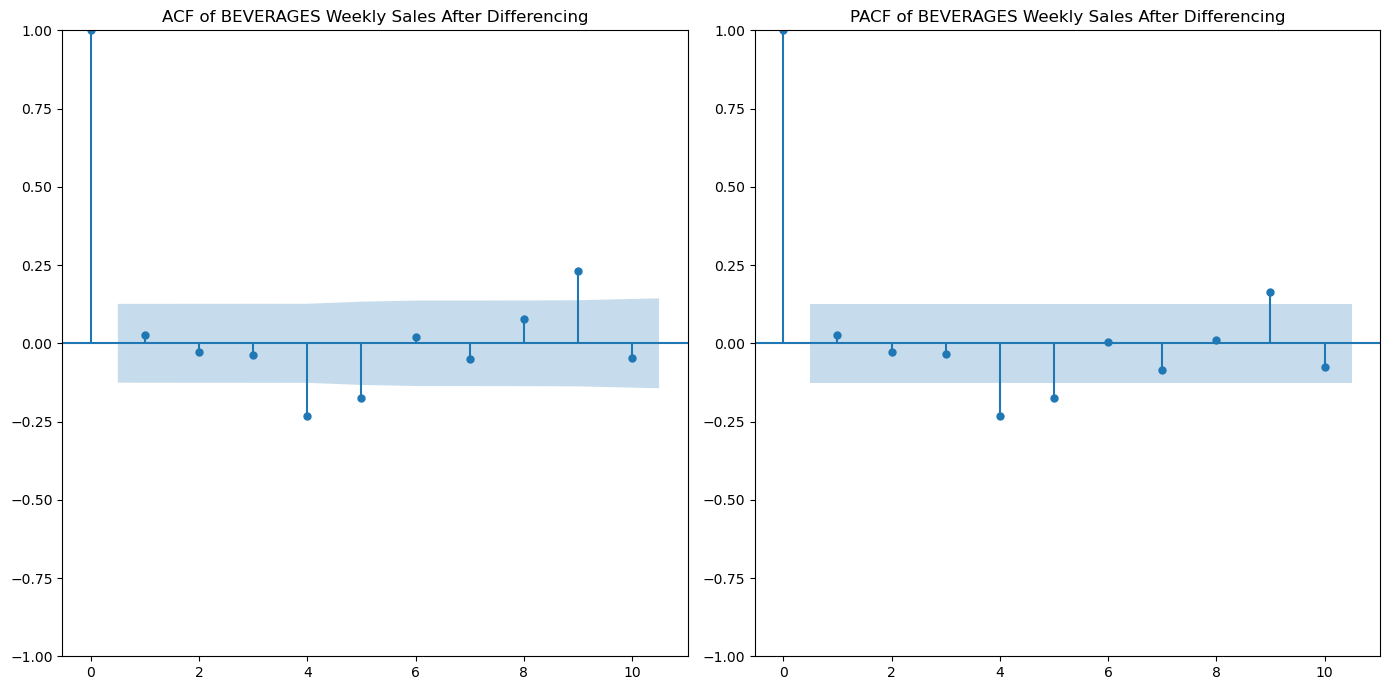

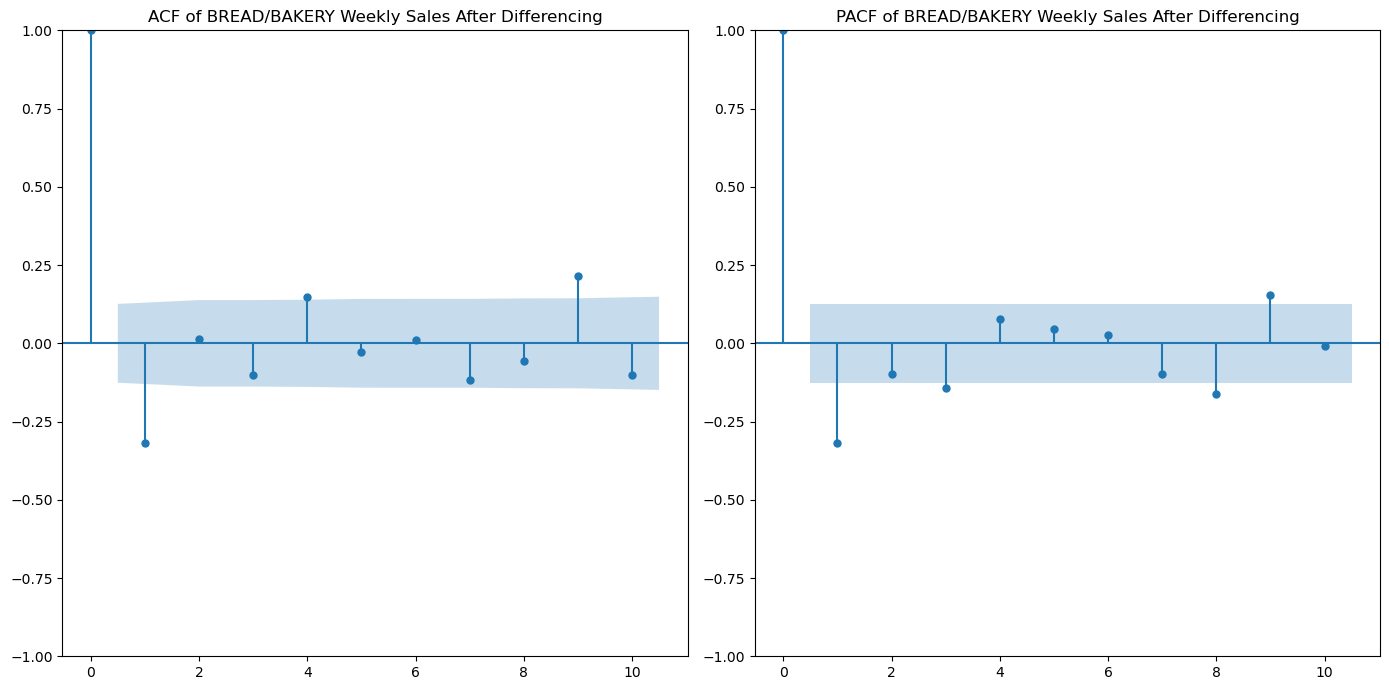

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for family in data['family'].unique():
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        fam_data_weekly['sales_diff'] = fam_data_weekly['sales'].diff().fillna(0)
        
        # Plot ACF and PACF of differenced sales data
        fig, ax = plt.subplots(1, 2, figsize=(14, 7))
        plot_acf(fam_data_weekly['sales_diff'], lags=10, ax=ax[0])
        ax[0].set_title(f'ACF of {family} Weekly Sales After Differencing')
        plot_pacf(fam_data_weekly['sales_diff'], lags=10, ax=ax[1])
        ax[1].set_title(f'PACF of {family} Weekly Sales After Differencing')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for family '{family}'")

In [18]:
# 'AUTOMOTIVE', 'BEAUTY', 'BEVERAGES', 'BREAD/BAKERY'

p = {
    'AUTOMOTIVE':3,
    'BEAUTY': 5,
    'BEVERAGES' :0,
    'BREAD/BAKERY':1,
}
q = {
    'AUTOMOTIVE':1,
    'BEAUTY':1,
    'BEVERAGES' :0,
    'BREAD/BAKERY':1, 
}

d = {
    'AUTOMOTIVE':1,
    'BEAUTY': 1,
    'BEVERAGES' :1,
    'BREAD/BAKERY':1,
   
}

is_seasonal = {
    'AUTOMOTIVE':False,
    'BEAUTY': False,
    'BEVERAGES' :False,
    'BREAD/BAKERY':False,
    
}

In [19]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Summary for AUTOMOTIVE Weekly Sales:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  193
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -666.526
Date:                Mon, 24 Jun 2024   AIC                           1343.052
Time:                        21:27:00   BIC                           1359.340
Sample:                             0   HQIC                          1349.649
                                - 193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0446      0.081      0.551      0.581      -0.114       0.203
ar.L2          0.0553      0.079      0.704      0.481      -0.099       0.209
ar.L3         -

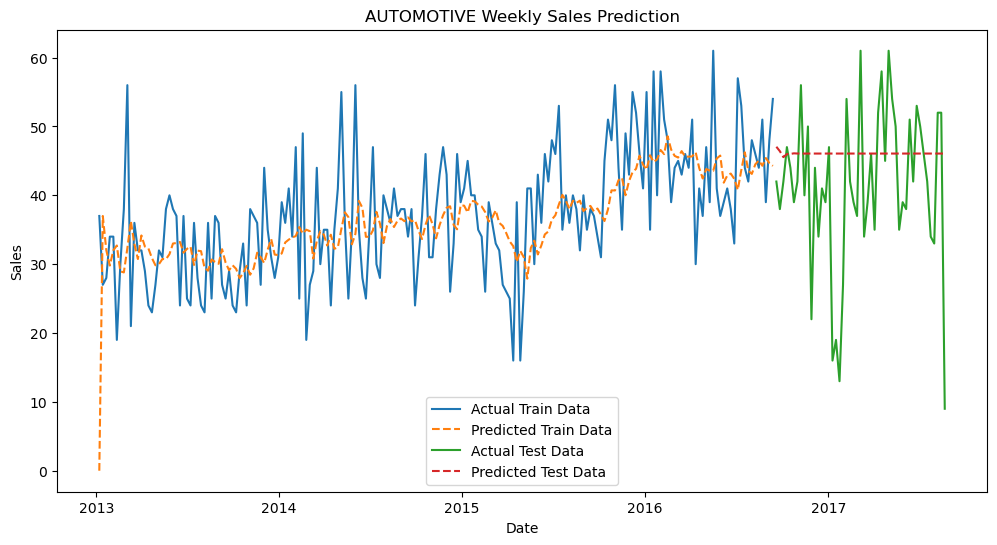

Summary for BEAUTY Weekly Sales:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  193
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -687.975
Date:                Mon, 24 Jun 2024   AIC                           1389.951
Time:                        21:27:00   BIC                           1412.753
Sample:                             0   HQIC                          1399.186
                                - 193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3366      0.083      4.044      0.000       0.173       0.500
ar.L2          0.1176      0.082      1.438      0.150      -0.043       0.278
ar.L3         -0.02

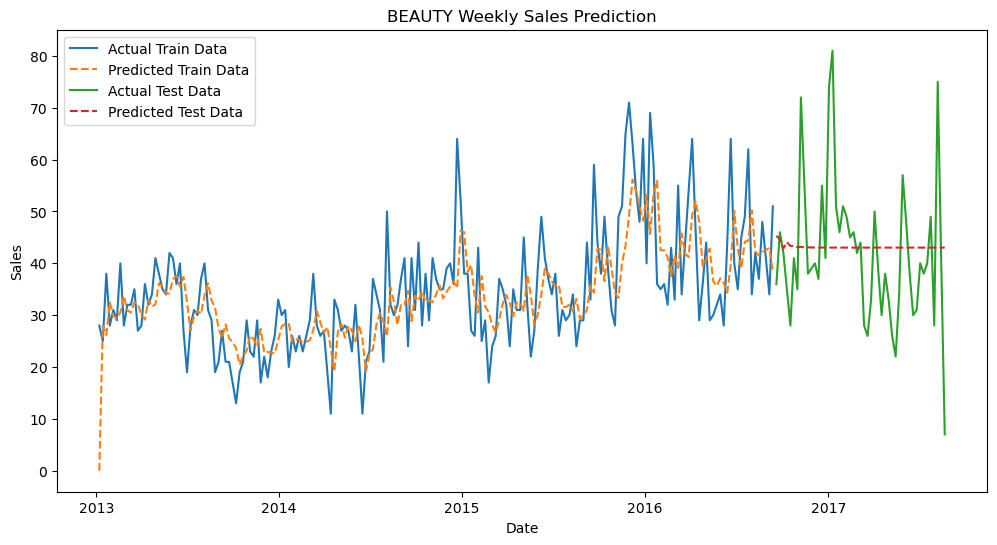

Summary for BEVERAGES Weekly Sales:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  193
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1715.818
Date:                Mon, 24 Jun 2024   AIC                           3433.637
Time:                        21:27:00   BIC                           3436.894
Sample:                             0   HQIC                          3434.956
                                - 193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.369e+06   1.32e+05     25.445      0.000    3.11e+06    3.63e+06
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1079.52
Prob(Q):   

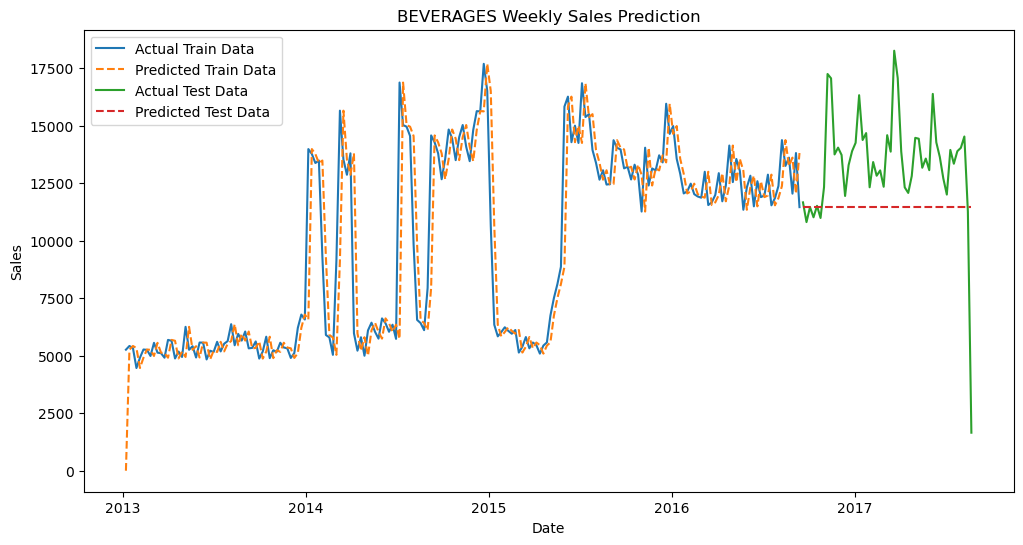

Summary for BREAD/BAKERY Weekly Sales:
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  193
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1291.934
Date:                Mon, 24 Jun 2024   AIC                           2589.868
Time:                        21:27:01   BIC                           2599.641
Sample:                             0   HQIC                          2593.826
                                - 193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1419      0.110     -1.291      0.197      -0.357       0.074
ma.L1         -0.4635      0.101     -4.609      0.000      -0.661      -0.266
sigma2      4

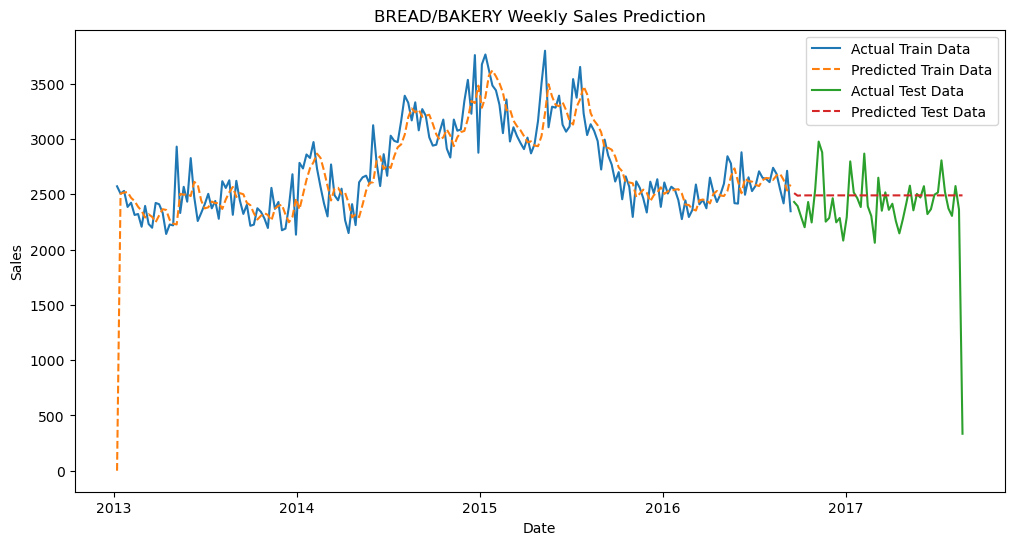

In [20]:
import numpy as np

def arima_analysis(data, family, p, d, q):
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        train_size = int(len(fam_data_weekly) * 0.8)
        train, test = fam_data_weekly[:train_size], fam_data_weekly[train_size:]
        
        model = ARIMA(train['sales'], order=(p[family], d[family], q[family]))
        
        
        model_fit = model.fit()
        
        print(f"Summary for {family} Weekly Sales:")
        print(model_fit.summary())
        
        train['predicted'] = model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')
  
        test['predicted'] = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
       
        rmse_train = np.sqrt(mean_squared_error(train['sales'], train['predicted']))
        rmse_test = np.sqrt(mean_squared_error(test['sales'], test['predicted']))
        
        print(f"RMSE Train: {rmse_train}")
        print(f"RMSE Test: {rmse_test}")
        
        accuracy_test = np.mean(np.where(test['sales'] >= test['predicted'], test['predicted'] / test['sales'], test['sales'] / test['predicted']))
        print(f"Accuracy Test: {accuracy_test:.2%}")
        

        plt.figure(figsize=(12, 6))
        plt.plot(train['date'], train['sales'], label='Actual Train Data')
        plt.plot(train['date'], train['predicted'], label='Predicted Train Data', linestyle='--')
        plt.plot(test['date'], test['sales'], label='Actual Test Data')
        plt.plot(test['date'], test['predicted'], label='Predicted Test Data', linestyle='--')
        plt.title(f'{family} Weekly Sales Prediction')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.show()
        
    else:
        print(f"No data found for family '{family}'")

for family in data['family'].unique():
    arima_analysis(data, family, p, d, q)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


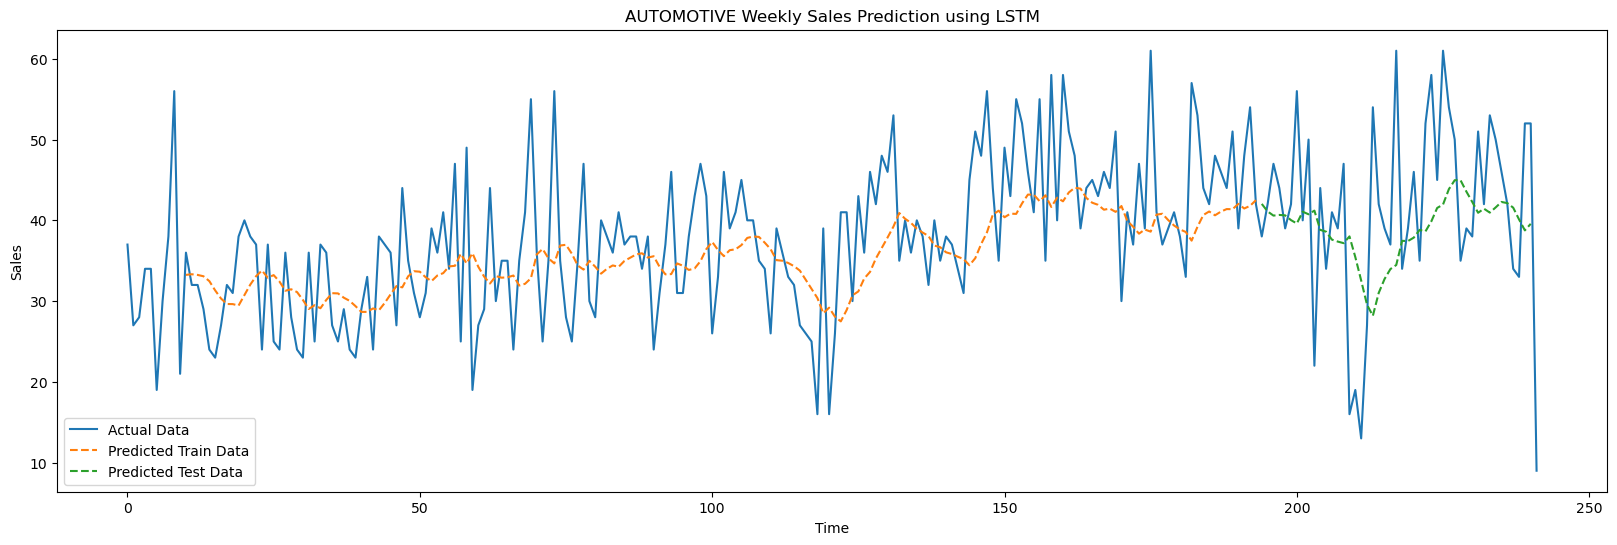

-------------------RMSE-------------------
Test RMSE: 10.96892842790923
Train RMSE: 7.843520792517504
Accuracy: 0.8142688878434734
------------------------------------------


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


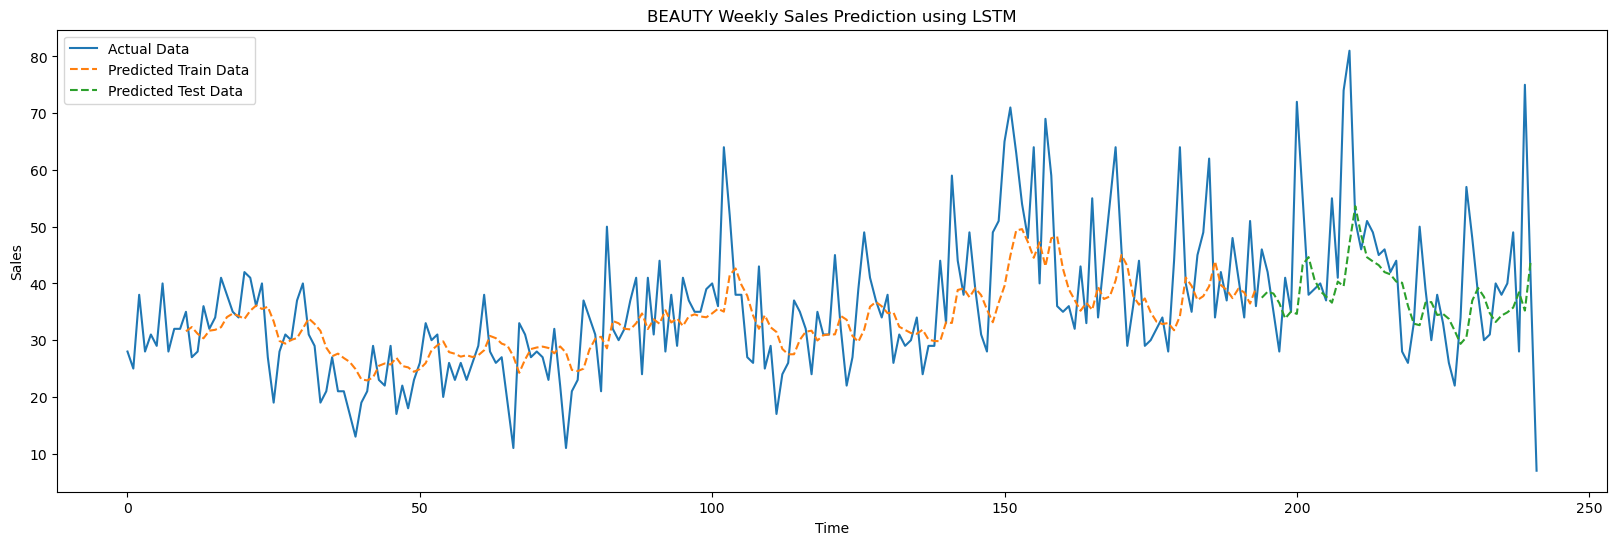

-------------------RMSE-------------------
Test RMSE: 13.252840105422731
Train RMSE: 9.141421141178066
Accuracy: 0.8275436989790899
------------------------------------------


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


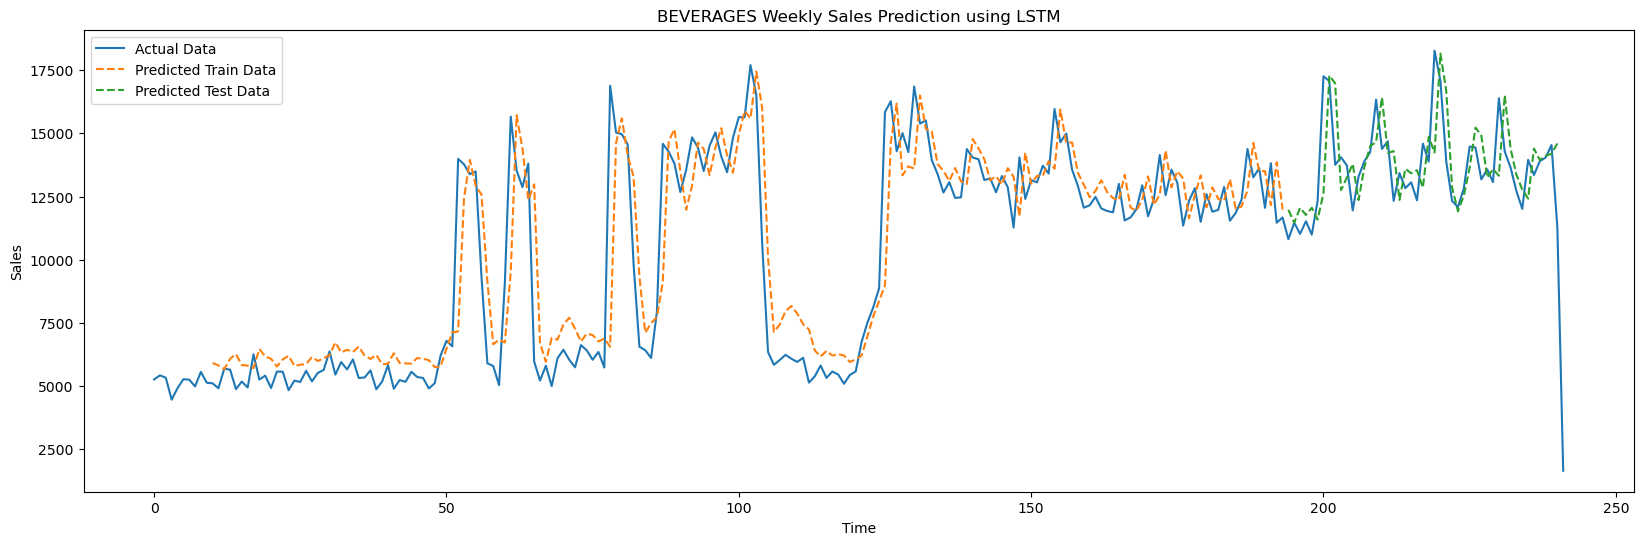

-------------------RMSE-------------------
Test RMSE: 1607.0573960435052
Train RMSE: 1819.8885609894085
Accuracy: 0.9200887152404426
------------------------------------------


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


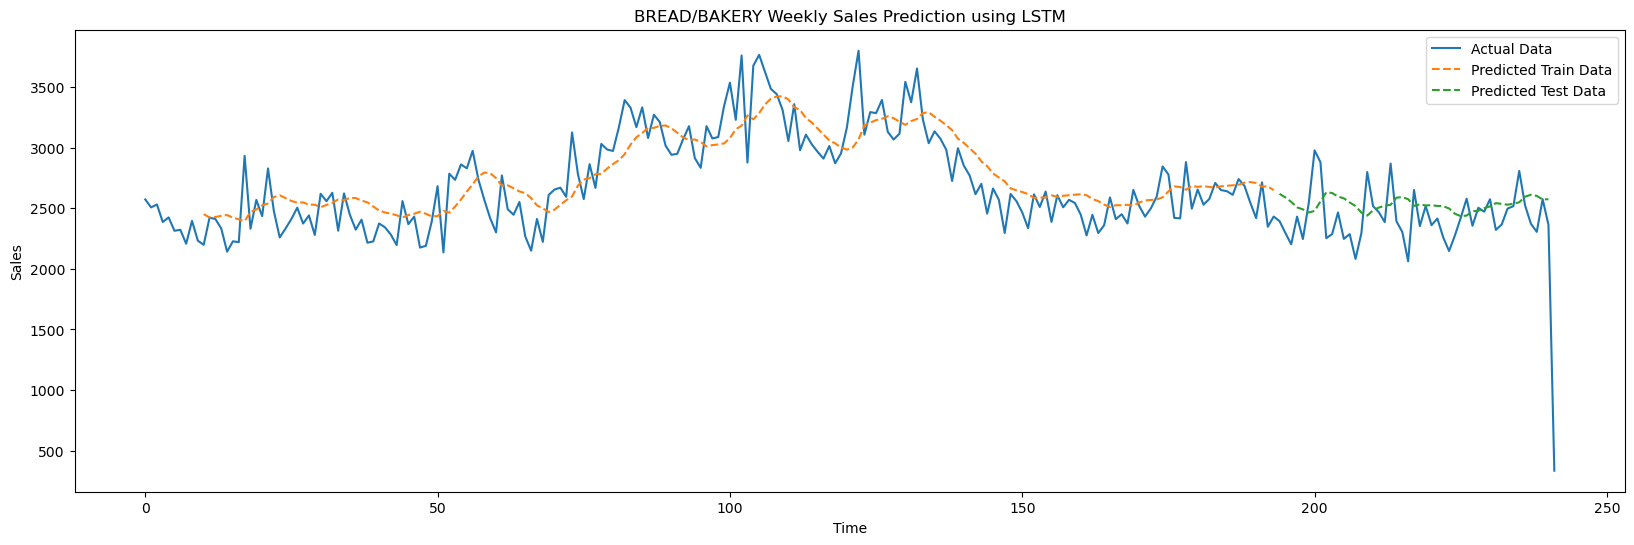

-------------------RMSE-------------------
Test RMSE: 239.55935780769562
Train RMSE: 224.88501931418202
Accuracy: 0.9240632981013153
------------------------------------------




In [22]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)


def prepare_train_data_for(family_data, look_back=1):
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    
    scaled_data = scaler.fit_transform(family_data[['sales']].values)
    
    
    X, y = create_dataset(scaled_data, look_back)
    
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    

    train_size = int(len(X) * 0.8)
    test_size = len(X) - train_size
    X_train, X_test = X[0:train_size], X[train_size:len(X)]
    y_train, y_test = y[0:train_size], y[train_size:len(y)]
    
    return X_train, X_test, y_train, y_test, scaler, scaled_data


def LSTM_try_to_predict(data, family, look_back=10, epochs=10, batch_size=1):
   
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        X_train, X_test, y_train, y_test, scaler, scaled_data = prepare_train_data_for(fam_data_weekly, look_back)
        
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
        model.add(LSTM(50))
        model.add(Dense(1))
       
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        
    
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        
        train_predict = scaler.inverse_transform(train_predict)
        y_train = scaler.inverse_transform([y_train])
        test_predict = scaler.inverse_transform(test_predict)
        y_test = scaler.inverse_transform([y_test])
        
        train_plot = np.empty_like(scaled_data)
        train_plot[:, :] = np.nan
        train_plot[look_back:len(train_predict) + look_back, :] = train_predict
        
        test_plot = np.empty_like(scaled_data)
        test_plot[:, :] = np.nan
        test_plot[len(train_predict) + look_back:len(scaled_data) - 1, :] = test_predict
        
        plt.figure(figsize=(20, 6))
        plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
        plt.plot(train_plot, label='Predicted Train Data', linestyle='--')
        plt.plot(test_plot, label='Predicted Test Data', linestyle='--')
        plt.title(f'{family} Weekly Sales Prediction using LSTM')
        plt.xlabel('Time')
        plt.ylabel('Sales')
        plt.legend()
        plt.show()
        
        rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
        rmse_train = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
        accuracy_test = np.mean(np.where(y_test[0] >= test_predict[:, 0], test_predict[:, 0] / y_test[0], y_test[0] / test_predict[:, 0]))
        
        print('-------------------RMSE-------------------')
        print(f'Test RMSE: {rmse_test}')
        print(f'Train RMSE: {rmse_train}')
        print(f'Accuracy: {accuracy_test}')
        print('------------------------------------------\n\n')
        
        return rmse_test, rmse_train, accuracy_test, model
    
    else:
        print(f"No data found for family '{family}'")

for family in data['family'].unique():
    LSTM_try_to_predict(data, family)

In [23]:
results = []

def arima_analysis(data, family, p, d, q):
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        train_size = int(len(fam_data_weekly) * 0.8)
        train, test = fam_data_weekly[:train_size], fam_data_weekly[train_size:]
        
        model = ARIMA(train['sales'], order=(p[family], d[family], q[family]))
        model_fit = model.fit()
        
        train['predicted'] = model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')
        test['predicted'] = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
       
        rmse_train = np.sqrt(mean_squared_error(train['sales'], train['predicted']))
        rmse_test = np.sqrt(mean_squared_error(test['sales'], test['predicted']))
        
        accuracy_test = np.mean(np.where(test['sales'] >= test['predicted'], test['predicted'] / test['sales'], test['sales'] / test['predicted']))
        
        results.append({
            'Family': family,
            'Model': 'ARIMA',
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Accuracy Test': accuracy_test
        })
        
    else:
        print(f"No data found for family '{family}'")

def LSTM_try_to_predict(data, family, look_back=10, epochs=10, batch_size=1):
    fam_data_weekly = family_data(data, family)
    
    if fam_data_weekly is not None:
        X_train, X_test, y_train, y_test, scaler, scaled_data = prepare_train_data_for(fam_data_weekly, look_back)
        
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
        model.add(LSTM(50))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        
        train_predict = scaler.inverse_transform(train_predict)
        y_train = scaler.inverse_transform([y_train])
        test_predict = scaler.inverse_transform(test_predict)
        y_test = scaler.inverse_transform([y_test])
        
        rmse_test = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
        rmse_train = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
        accuracy_test = np.mean(np.where(y_test[0] >= test_predict[:, 0], test_predict[:, 0] / y_test[0], y_test[0] / test_predict[:, 0]))
        
        results.append({
            'Family': family,
            'Model': 'LSTM',
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test,
            'Accuracy Test': accuracy_test
        })
        
    else:
        print(f"No data found for family '{family}'")

for family in data['family'].unique():
    arima_analysis(data, family, p, d, q)
    LSTM_try_to_predict(data, family)

results_df = pd.DataFrame(results)
print("Comparison of ARIMA and LSTM Models:")
print(results_df)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Comparison of ARIMA and LSTM Models:
         Family  Model   RMSE Train    RMSE Test  Accuracy Test
0    AUTOMOTIVE  ARIMA     8.214002    12.439039       0.806582
1    AUTOMOTIVE   LSTM     7.672913    10.697206       0.821155
2        BEAUTY  ARIMA     8.902385    13.745134       0.796476
3        BEAUTY   LSTM     9.036212    13.044542       0.828621
4     BEVERAGES  ARIMA  1874.092308  3031.878827       0.835245
5     BEVERAGES   LSTM  1783.759722  1666.714237       0.917000
6  BREAD/BAKERY  ARIMA   273.754490   368.899155       0.919904
7  BREAD/BAKERY   LSTM   396.166461   324.742859       0.899493
